# Goals


### Train a classifier using resnet50 on caltech-256 dataset

### Understand what lies inside resnet50 network

# What is resnet

## Readings on resnet

  1) Points from https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035
    - The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers
    - The deeper model should not produce a training error higher than its shallower counterparts.
    - solves the problem of vanishing gradiens as network depth increased - https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257
    
    
 
  2) Points from https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624
    - Won 1st place in the ILSVRC 2015 classification competition with top-5 error rate of 3.57% (An ensemble model)
    - Efficiently trained networks with 100 layers and 1000 layers also.
    - Replacing VGG-16 layers in Faster R-CNN with ResNet-101. They observed a relative improvements of 28%
    

  3) Read more here
    - https://arxiv.org/abs/1512.03385
    - https://d2l.ai/chapter_convolutional-modern/resnet.html
    - https://cv-tricks.com/keras/understand-implement-resnets/
    - https://mc.ai/resnet-architecture-explained/


# Table of Contents


## [0. Install](#0)


## [1. Load experiment with resnet base architecture](#1)


## [2. Visualize resnet](#2)


## [3. Train the classifier](#3)


## [4. Run inference on trained classifier](#5)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [3]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 2112 (delta 115), reused 121 (delta 57), pack-reused 1905
Receiving objects: 100% (2112/2112), 73.72 MiB | 4.33 MiB/s, done.
Resolving deltas: 100% (1135/1135), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Caltech-256
    - https://www.kaggle.com/jessicali9530/caltech256

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Lltrl2U4L8WJkyBjMBFHSaoK8dLhoItl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Lltrl2U4L8WJkyBjMBFHSaoK8dLhoItl" -O caltech256.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq caltech256.zip

# Imports

In [2]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [3]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Load experiment with resnet base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [8]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "resnet-intro");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: resnet-intro
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Project/resnet-intro/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----resnet-intro
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    caltech-256
        |
        |-----train
                |------bat
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------elephant
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)
         |
         |
         |-----val
                |------bat
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------elephant
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)

In [9]:
gtf.Default(dataset_path="caltech256/train", 
            model_name="resnet50_v2", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     caltech256/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7



/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:312: UserWarning: Ignoring caltech256/train/198.spider/RENAME2 of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 21424
    Num val images:   9183
    Num classes:      257

Model Params
    Model name:           resnet50_v2
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet50_v2
        Num of potentially trainable layers:  105
        Num of actual trainable layers:       104

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:                           resnet50_v2
        Num of potentially trainable layers:  105
        Num of actual trainable layers:       104

<a id='2'></a>
# Visualize resnet

In [10]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8082


## resnet block - 1
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

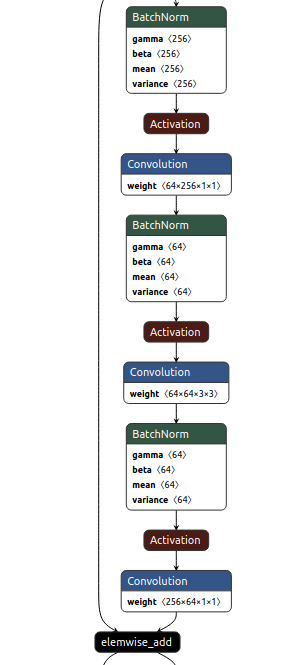

In [11]:
from IPython.display import Image
Image(filename='imgs/resnet50_v2_bottleneck_block1_mxnet.png') 

## Properties

  - This block has 2 branches
    - First branch is the identity branch, it takes the input and pushes it as the output, the Residual
    - Second branch has these layers
        - batchnorm -> relu -> conv_1x1 -> batchnorm -> relu -> conv_3x3 -> batchnorm -> relu -> conv_1x1
        
  - The branches are added elementwise, so both the branches need to have same sized output
  
  - The final layer to this block is relu
  
  
### Unlike resnet18-v2 Block 1 this has a bottleneck block
   
   - The bottleneck
     - The num features in first and middle convolutions is input_features/4
     - The final convolution has features = input_features
     
   - Eg.
          - batchnorm -> relu -> conv_1x1 -> batchnorm -> relu -> conv_3x3 -> batchnorm -> relu -> conv_1x1

    (feat-in)-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------(feat-out)    
       256 ------------------------------------------------> 64------------------------>-----------------------------64------------------------>--------------------------->256 -------->  256    

## resnet block - 2
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

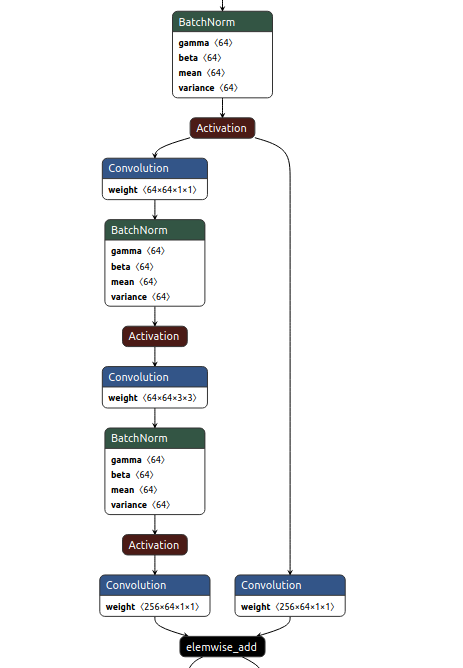

In [12]:
from IPython.display import Image
Image(filename='imgs/resnet50_v2_bottleneck_block2_mxnet.png') 

## Properties

  - The block has two starting elements
    - batchnorm -> relu
  - Post the starting elements this block has 2 branches
    - First branch has these layers
        - conv_1x1
    - Second branch has these layers
        - conv_1x1 -> batchnorm -> relu -> conv_3x3 -> batchnorm -> relu -> conv_1x1
        
  - The branches are added elementwise, so both the branches need to have same sized output
  
  - The final layer to this block is relu
  
  
### Unlike resnet18-v2 Block 2 this has a bottleneck block
   
   - The bottleneck
     - The num features in first and middle convolutions is input_features/4
     - The final convolution has features = input_features
     
   - Eg.
          - conv_1x1 -> batchnorm -> relu -> conv_3x3 -> batchnorm -> relu -> conv_1x1

    (feat-in)-----------------------------------------------------------------------------------------------------------------------------------------------------------(feat-out)    
       256 ----------> 64------------------------>-----------------------------64------------------------>-----------------------------256----------------------------->  256    

## resnet fully connected chain

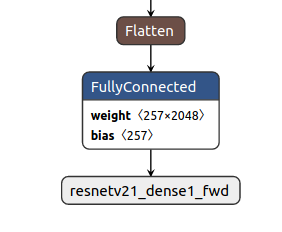

In [13]:
from IPython.display import Image
Image(filename='imgs/resnet50_v2_block_fc_mxnet.png') 

## resnet Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

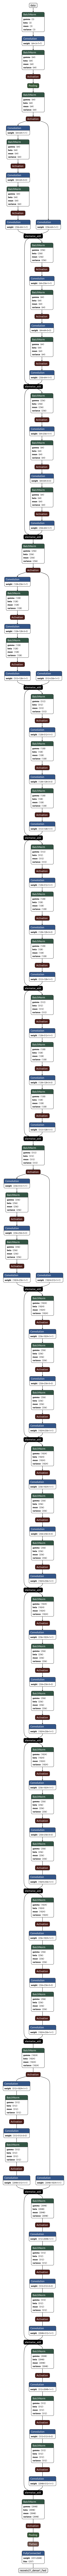

In [15]:
from IPython.display import Image
Image(filename='imgs/resnet50_v2_mxnet.png') 

## Properties

  - This network 
    - has 12 type-1 blocks
    - has 4 type-2 blocks
    - post these blocks the type-3 (fc) block exists


<a id='3'></a>
# Train the classifier

In [16]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.362, Train-loss: 3.079 | Val-acc: 0.518349, Val-loss: 2.148, | time: 348.7 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.594, Train-loss: 1.751 | Val-acc: 0.570729, Val-loss: 1.843, | time: 413.8 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.675, Train-loss: 1.364 | Val-acc: 0.632691, Val-loss: 1.589, | time: 345.8 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.737, Train-loss: 1.067 | Val-acc: 0.636829, Val-loss: 1.566, | time: 338.0 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.781, Train-loss: 0.879 | Val-acc: 0.660242, Val-loss: 1.443, | time: 341.7 sec

    Training completed in: 29m 44s
    Best val Acc:          0.660242

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Project/resnet-intro/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Project/resnet-intro/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log: 

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Run inference on trained classifier

In [17]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "resnet-intro", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Project/resnet-intro/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Project
    Experiment: resnet-intro
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/3_resnet/workspace/Project/resnet-intro/



Prediction
    Image name:         caltech256/test/test1.jpg
    Predicted class:      001.ak47
    Predicted score:      36.1069450378418



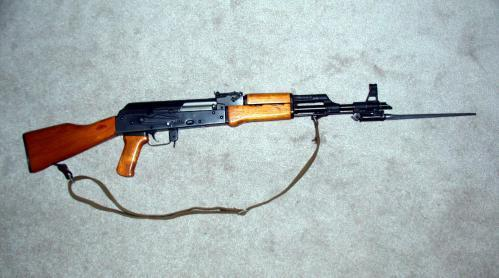

In [19]:
output = gtf.Infer(img_name = "caltech256/test/test1.jpg");
from IPython.display import Image
Image(filename='caltech256/test/test1.jpg') 

Prediction
    Image name:         caltech256/test/test2.jpg
    Predicted class:      007.bat
    Predicted score:      15.434477806091309



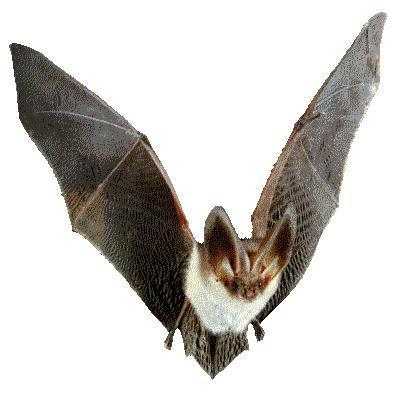

In [20]:
output = gtf.Infer(img_name = "caltech256/test/test2.jpg");
from IPython.display import Image
Image(filename='caltech256/test/test2.jpg') 

Prediction
    Image name:         caltech256/test/test3.jpg
    Predicted class:      091.grand-piano-101
    Predicted score:      35.81298065185547



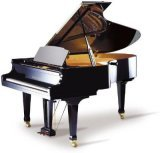

In [21]:
output = gtf.Infer(img_name = "caltech256/test/test3.jpg");
from IPython.display import Image
Image(filename='caltech256/test/test3.jpg') 